## <br>Import library<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
import warnings
import pickle
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder, StandardScaler
warnings.filterwarnings('ignore')

df = pd.read_csv('data.txt', sep='\t')
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


## <br>Cek info tiap kolom<br>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


## <br>Eksplorasi data numerik<br>

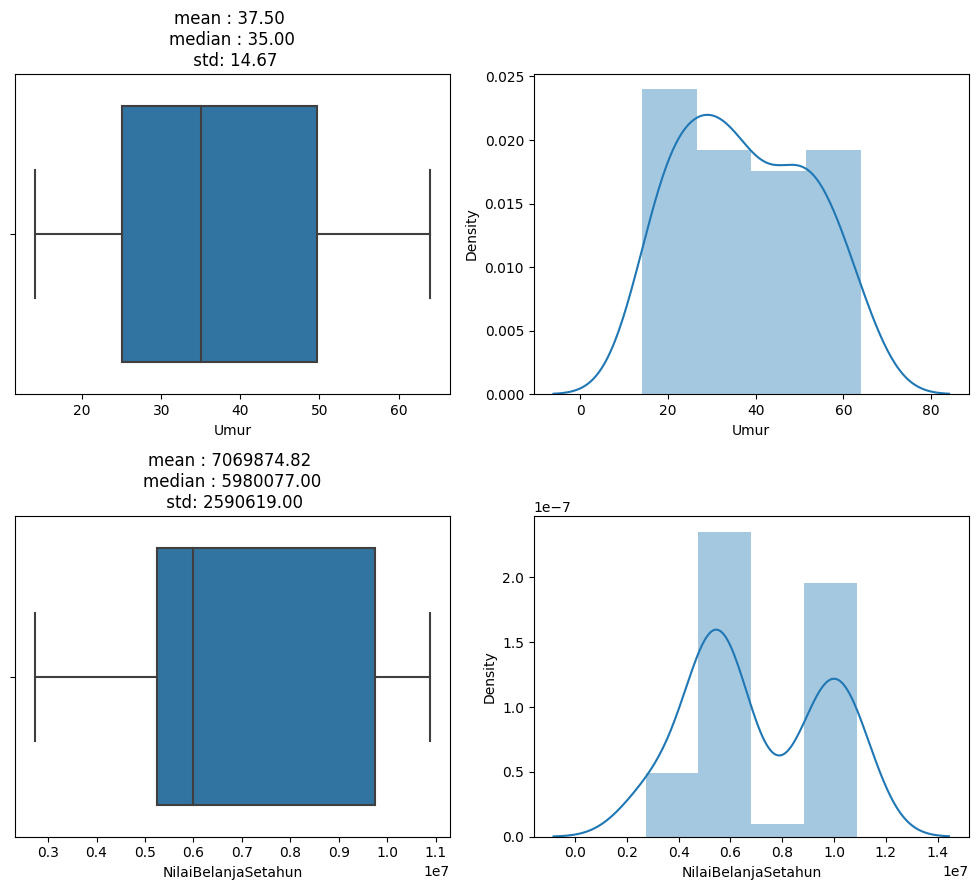

In [4]:
fig, ax = plt.subplots(2,2,figsize=(10,9))
sns.boxplot(x=df['Umur'], ax=ax[0][0])
ax[0][0].set_title('mean : %.2f \nmedian : %.2f\n std: %.2f'%(df['Umur'].mean(),df['Umur'].median(),df['Umur'].std()))
sns.distplot(df['Umur'], ax=ax[0][1])
sns.boxplot(x=df['NilaiBelanjaSetahun'], ax=ax[1][0])
ax[1][0].set_title('mean : %.2f \nmedian : %.2f\n std: %.2f'%(df['NilaiBelanjaSetahun'].mean(),df['NilaiBelanjaSetahun'].median(),df['NilaiBelanjaSetahun'].std()))
sns.distplot(df['NilaiBelanjaSetahun'], ax=ax[1][1], kde=True)
plt.tight_layout()
plt.show()

## <br>Eksplorasi data kategorik
<br>

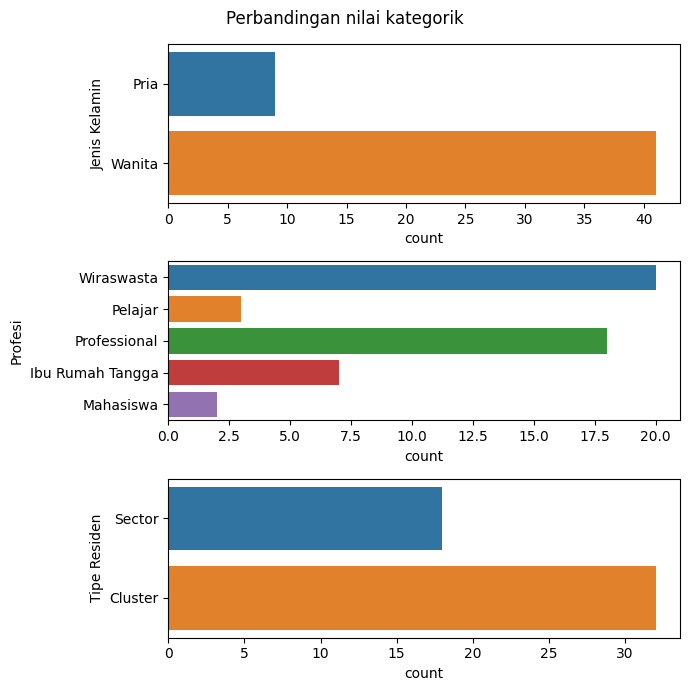

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(7,7))
kolom_kategorik = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']
for index, kolom in enumerate(kolom_kategorik):
    sns.countplot(data=df, y=df[kolom], ax=ax[index])

fig.suptitle('Perbandingan nilai kategorik')
plt.tight_layout()
plt.show()

## <br>Standarisasi data numerik<br>

In [5]:
kolom_numerik = ['Umur', 'NilaiBelanjaSetahun']

df_ss_numerik = StandardScaler().fit_transform(df[kolom_numerik])

df_numerik = pd.DataFrame(data=df_ss_numerik, index=df.index, columns=kolom_numerik)
df_numerik.head()

,Umur,NilaiBelanjaSetahun
0,1.411245,0.946763
1,-1.617768,-1.695081
2,0.722833,-0.695414
3,1.067039,-0.727361
4,0.240944,1.382421


## <br>Pelabelan data kategorik<br>

In [8]:
le = LabelEncoder()
df_encode = df[kolom_kategorik].copy()
for kol in kolom_kategorik:
    df_encode[kol] = le.fit_transform(df[kol])

print(df_encode.head())
print(df.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


## <br>Penggabungan data hasil preprocessing<br>

In [9]:
df_gabungan = df_encode.merge(df_numerik, how='left', left_index=True, right_index=True)
df_gabungan.head()

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081
2,0,3,0,0.722833,-0.695414
3,0,3,0,1.067039,-0.727361
4,1,4,0,0.240944,1.382421


## <br>Mencari model terbaik<br>

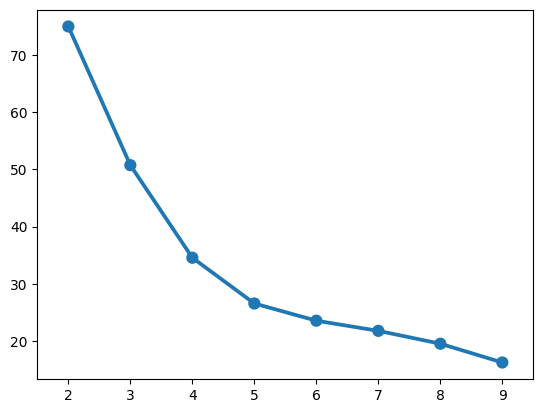

In [10]:
cost = {}

for i in range(2,10):
    model = KPrototypes(n_clusters=i)
    model.fit_predict(df_gabungan, categorical=[0,1,2])
    cost[i] = model.cost_

sns.pointplot(x = list(cost.keys()), y=list(cost.values()))
plt.show()

## <br>Membuat model<br>

In [11]:
model = KPrototypes(n_clusters=5, random_state=42)
model.fit(df_gabungan, categorical=[0,1,2])

pickle.dump(model, open('model cluster.pkl', 'wb'))

## <br>Menggunakan model<br>

In [12]:
cluster = model.predict(df_gabungan, categorical=[0,1,2])
cluster

array([0, 2, 3, 3, 4, 1, 0, 3, 1, 1, 3, 3, 0, 0, 4, 1, 1, 3, 4, 2, 4, 3,
       1, 4, 4, 3, 4, 1, 3, 3, 2, 0, 2, 4, 1, 4, 1, 0, 1, 2, 1, 4, 1, 4,
       1, 4, 3, 0, 1, 0], dtype=uint16)

In [13]:
df_gabungan['cluster'] = cluster
df_gabungan.head()

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun,cluster
0,0,4,1,1.411245,0.946763,0
1,1,2,0,-1.617768,-1.695081,2
2,0,3,0,0.722833,-0.695414,3
3,0,3,0,1.067039,-0.727361,3
4,1,4,0,0.240944,1.382421,4


## <br>Mapping segmen awal<br>

In [14]:
tipe = {
    0:'diamond senior enterprenuer',
    1:'gold young member',
    2:'silver student',
    3:'gold senior member',
    4:'diamond young enterprenuer'
}
df_gabungan['segmen'] = df_gabungan['cluster'].map(tipe)
df_gabungan.head()

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun,cluster,segmen
0,0,4,1,1.411245,0.946763,0,diamond senior enterprenuer
1,1,2,0,-1.617768,-1.695081,2,silver student
2,0,3,0,0.722833,-0.695414,3,gold senior member
3,0,3,0,1.067039,-0.727361,3,gold senior member
4,1,4,0,0.240944,1.382421,4,diamond young enterprenuer


## <br>Visualisasi hasil cluster<br>

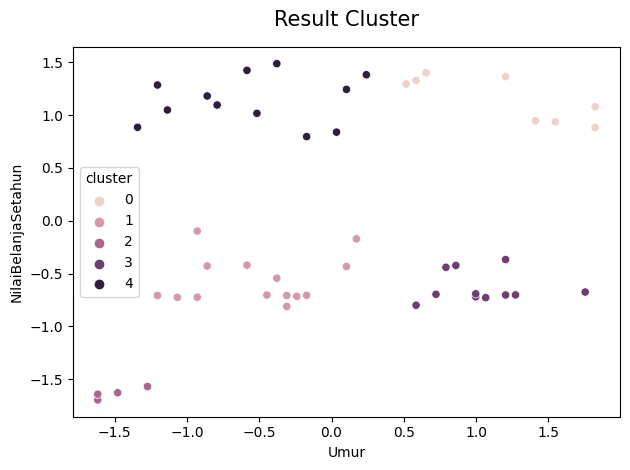

In [33]:
sns.scatterplot(data=df_gabungan, y='NilaiBelanjaSetahun', x='Umur', hue='cluster')
plt.title('Result Cluster', pad=15, fontsize=15)
plt.tight_layout()
plt.show()

## <br>Penggabungan data<br>

In [14]:
df_final = pd.read_csv('data.txt', sep='\t')
df_final['cluster'] = cluster
df_final.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,0
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,3
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,3
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,4


## <br>Menampilkan tiap cluster dari data<br>

In [15]:
for i in range(5):
    print(f'cluster {i}')
    print(df_final[df_final['cluster']==i].head())

cluster 0
   Customer_ID   Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0     CUST-001     Budi Anggara          Pria    58  Wiraswasta       Sector   
6     CUST-007    Cahyono, Agus          Pria    64  Wiraswasta       Sector   
12    CUST-013     Cahaya Putri        Wanita    64  Wiraswasta      Cluster   
13    CUST-014   Mario Setiawan          Pria    60  Wiraswasta      Cluster   
31    CUST-032  Chintya Winarni        Wanita    47  Wiraswasta       Sector   

    NilaiBelanjaSetahun  cluster  
0               9497927        0  
6               9837260        0  
12              9333168        0  
13              9471615        0  
31             10663179        0  
cluster 1
   Customer_ID         Nama Pelanggan Jenis Kelamin  Umur           Profesi  \
5     CUST-006        Rosalina Kurnia        Wanita    24      Professional   
8     CUST-009  Elisabeth Suryadinata        Wanita    29      Professional   
9     CUST-010         Mario Setiawan          Pria 

## <br>Visualisasi hasil clustering<br>
### 1.a kolom numerik

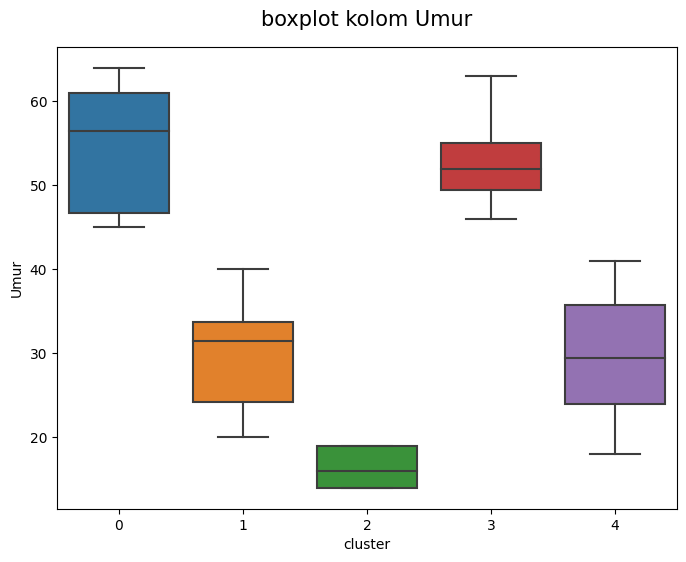

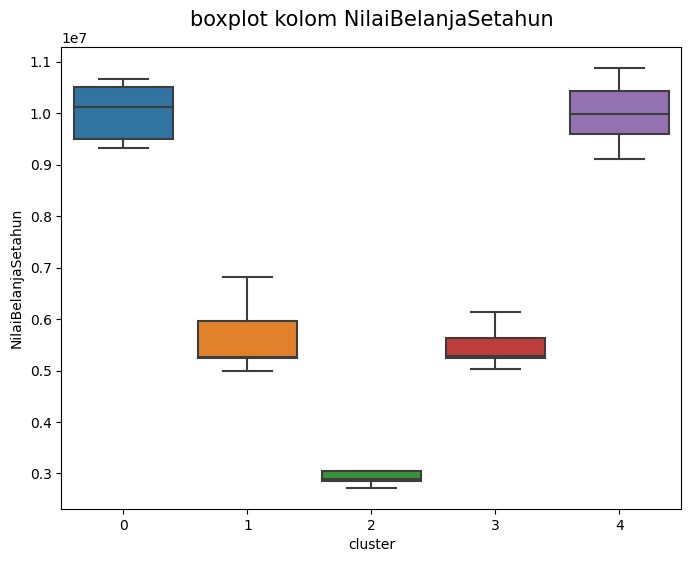

In [16]:
for i in kolom_numerik:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df_final, x='cluster', y=i)
    plt.title(f'boxplot kolom {i}', pad=15, fontsize=15)
    plt.show()

### <br>1.b kolom kategorik

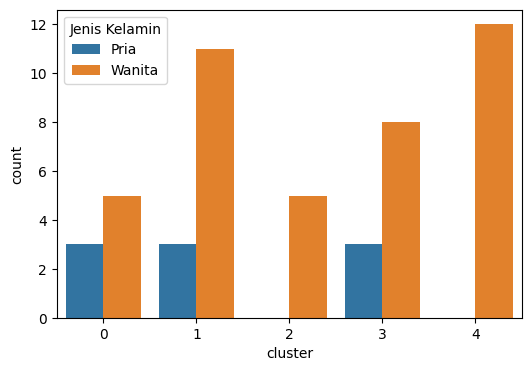

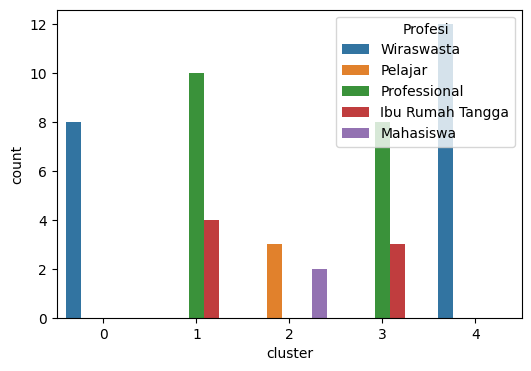

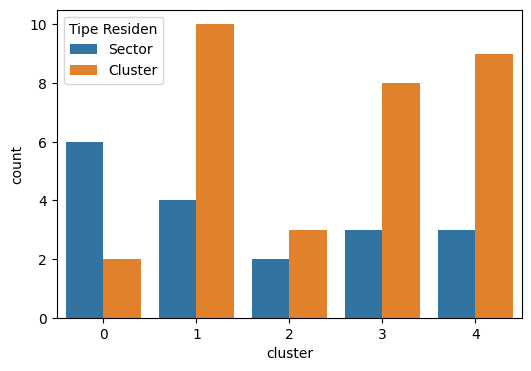

In [17]:
for i in kolom_kategorik:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_final, x='cluster', hue=i)

## <br>Penamaan tiap cluster<br>

<br>1. Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.<br><br>
2. Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.<br><br>
3. Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta. <br><br>
4. Cluster 3: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.<br><br>
5. Cluster 4: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.<br><br>

## <br>Mapping final<br>

In [18]:
tipe = {
    0:'diamond senior enterprenuer',
    1:'gold young member',
    2:'silver student',
    3:'gold senior member',
    4:'diamond young enterprenuer'
}

df_final['segmen'] = df_final['cluster'].map(tipe)
df_final.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,0,diamond senior enterprenuer
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2,silver student
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,3,gold senior member
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,3,gold senior member
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,4,diamond young enterprenuer


## <br> Testing data baru<br>

In [19]:
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000    
}]  

data_baru = pd.DataFrame(data)
data_baru

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000


## <br>Preprocessing data baru<br>

In [20]:
def prepro(df_awal):
    df = df_awal.copy()
    # kolom jenis kelamin
    df['Jenis Kelamin'] = df['Jenis Kelamin'].map({
        'Pria':0,
        'Wanita':1
    })
    # kolom profesi
    df['Profesi'] = df['Profesi'].map({
        'Ibu Rumah Tangga':0,
        'Mahasiswa':1,
        'Pelajar':2,
        'Professional':3,
        'Wiraswasta':4
    })
    #kolom tipe residen
    df['Tipe Residen'] = df['Tipe Residen'].map({
        'Sector':1,
        'Cluster':0
    })
    #standarisasi kolom umur
    df['Umur'] = (df['Umur']-37.5)/14.67
    # standarisasi kolom belanja
    df['NilaiBelanjaSetahun'] = (df['NilaiBelanjaSetahun']-7069874)/2590619
    
    return df[['Jenis Kelamin','Profesi','Tipe Residen','Umur','NilaiBelanjaSetahun']]

data_model = prepro(data_baru)
data_model

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,0,0.511247,0.447818


## <br>Memanggil model<br>

In [21]:
def model_predict(df):
    
    model = pickle.load(open('model cluster.pkl','rb'))
    
    return model.predict(df, categorical=[0,1,2])
hasil = model_predict(data_model)
data_baru['cluster'] = hasil
data_baru['segmen'] = tipe[hasil[0]]
data_baru

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000,0,diamond senior enterprenuer


## <br>Penggabungan hasil predict ke dalam data<br>

In [22]:
df_final = pd.concat([df_final,data_baru], ignore_index=True)
df_final

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,0,diamond senior enterprenuer
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2,silver student
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,3,gold senior member
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,3,gold senior member
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,4,diamond young enterprenuer
5,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,1,gold young member
6,CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,0,diamond senior enterprenuer
7,CUST-008,Danang Santosa,Pria,52,Professional,Cluster,5223569,3,gold senior member
8,CUST-009,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,1,gold young member
9,CUST-010,Mario Setiawan,Pria,33,Professional,Cluster,5257448,1,gold young member


## <br>Finishh....<br>